In [1]:
# Import dependencies and setup

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy.stats as st
from scipy.stats import linregress
import datetime as dt
from pathlib import Path


In [2]:
# Study data filepath
data_path = "Resources/GCB2022v27_MtCO2_flat.csv"

# Read the data
emissions_data = pd.read_csv(data_path)
emissions_data


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


##  Data Cleanup

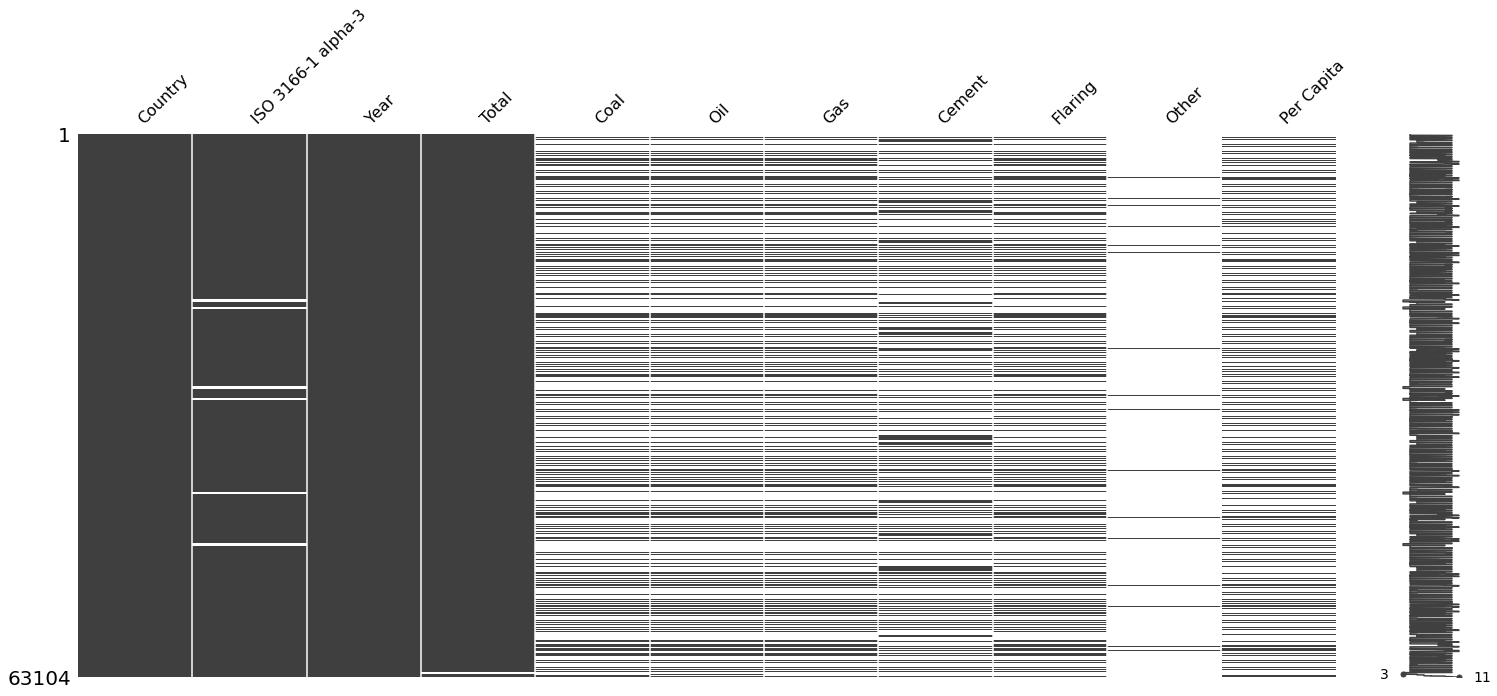

In [3]:
# Check dataset for missing values using a visual matrix

import missingno as msno
msno.matrix(emissions_data)

In [4]:
# Since "Other" column has a lot of missing values, exclude "Other" column and delete

del emissions_data['Other']
emissions_data

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,4.497423


In [5]:
# Replace the cells with "0" value with "NaN"

emissions_data = emissions_data.replace(0, np.nan)
emissions_data

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
0,Afghanistan,AFG,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,4.497423


In [6]:
# Delete rows with "NaN" values

cleaned_emissions_df = emissions_data.dropna(how="any")
cleaned_emissions_df

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
220,Afghanistan,AFG,1970,1.670397,0.436974,0.671986,0.216651,0.047350,0.297436,0.155343
221,Afghanistan,AFG,1971,1.893554,0.359072,0.747456,0.439680,0.043234,0.304112,0.171893
222,Afghanistan,AFG,1972,1.530347,0.190528,0.626544,0.300448,0.046427,0.366400,0.135588
223,Afghanistan,AFG,1973,1.635454,0.310745,0.701918,0.332680,0.067106,0.223005,0.141288
224,Afghanistan,AFG,1974,1.913152,0.304695,0.770914,0.400141,0.070301,0.367102,0.161177
...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,4.497423


In [7]:
# Get the latest year

latest_year = cleaned_emissions_df['Year'].max()
latest_year

2021

In [8]:
# Get the earliest year

earliest_year = cleaned_emissions_df['Year'].min()
earliest_year

1950

In [9]:
# Count the number of countries in the dataset

count = cleaned_emissions_df['Country'].unique().size
print("Total number of contries: "+ str(count))

Total number of contries: 90


In [10]:
# Display the countries in the dataset

print(cleaned_emissions_df['Country'].unique())


['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Canada' 'Chile' 'China'
 'Colombia' 'Croatia' 'Cuba' 'Czech Republic' 'Denmark' 'Egypt' 'Estonia'
 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iraq' 'Ireland' 'Iran' 'Israel' 'Italy' 'Japan'
 'Jordan' 'Kazakhstan' 'Kyrgyzstan' 'Latvia' 'Libya' 'Lithuania'
 'Luxembourg' 'Malaysia' 'Mexico' 'Mozambique' 'Myanmar' 'Netherlands'
 'New Zealand' 'Nigeria' 'Norway' 'Pakistan' 'Peru' 'Philippines'
 'Bolivia' 'Poland' 'Portugal' 'South Korea' 'Moldova' 'Romania' 'Russia'
 'Senegal' 'Serbia' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Syria' 'Taiwan' 'Tajikistan' 'Thailand' 'Tunisia' 'Turkey'
 'Turkmenistan' 'Ukraine' 'United Arab Emirates' 'United Kingdom'
 'Tanzania' 'USA' 'Uzbekistan' 'Venezuela' 'Viet Nam' 'Yemen' 'Global']


In [11]:
# Save as a new csv file

file_path = Path('Resources/cleaned_emissions_data.csv')
cleaned_emissions_df.to_csv(file_path, index=False)

##  Visualisations

In [ ]:
# Display the columns of the dataset

# cleaned_emissions_df.columns

Text(0.5, 1.0, 'Total Emissions for Each Country (1950-2021)')

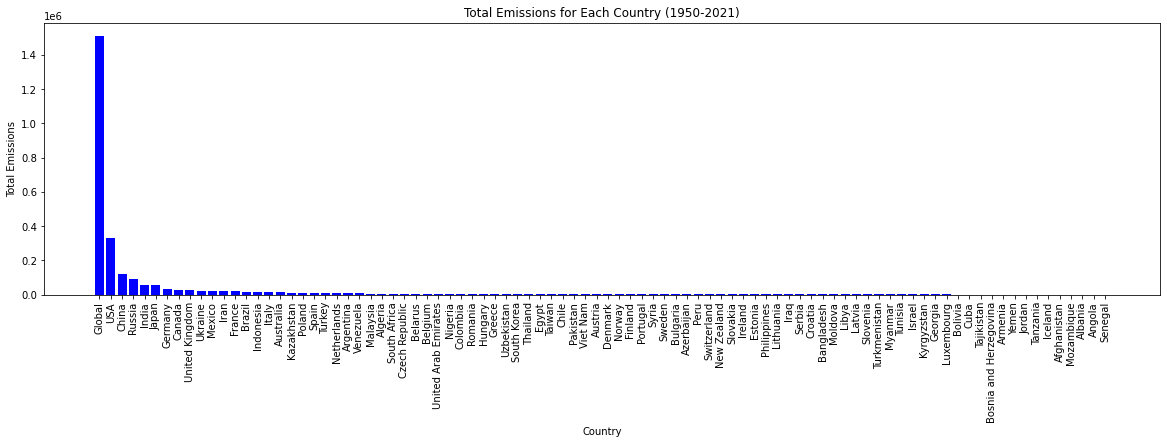

In [12]:
# Plot the total emissions for each country over the time

countries = list(cleaned_emissions_df.groupby('Country').sum().sort_values(by='Total', ascending=False).index)
total_values = list(cleaned_emissions_df.groupby('Country').sum().sort_values(by='Total', ascending=False)['Total'])
# countries
# total_values

fig1 = plt.figure(figsize=(20,5),)
plt.bar(countries, total_values, color ='blue',)
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Total Emissions")
plt.title("Total Emissions for Each Country (1950-2021)")


In [ ]:
# Create a dataframe of the total emissions of each country over time using a dictionary

# total_emissions_dict = {'Country':countries,'Total Emissions':total_values}
# total_emissions_df = pd.DataFrame(total_emissions_dict)
# total_emissions_df
  

Text(0.5, 1.0, 'Top 15 Coutries for Total Emissions from Coal (1950-2021)')

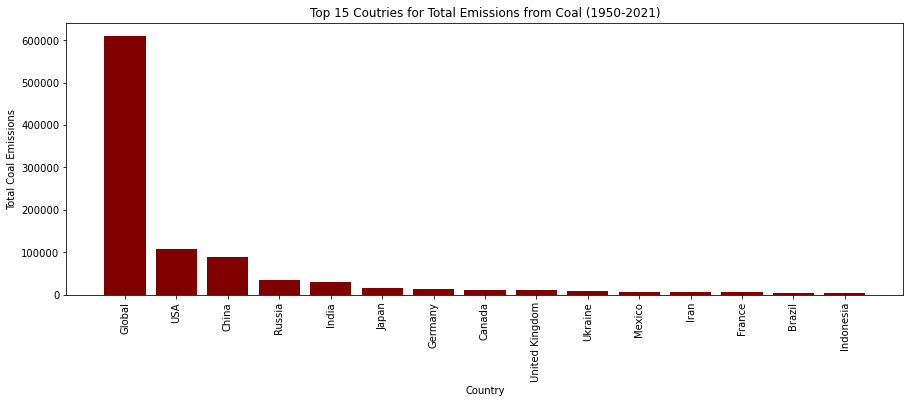

In [13]:
# Plot the top 15 coutries for total coal emissions over time

coal_values = list(cleaned_emissions_df.groupby('Country').sum().sort_values(by='Coal',ascending=False)['Coal'])

fig2 = plt.figure(figsize=(15,5),)
plt.bar(countries[:15], coal_values[:15], color ='maroon')
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Total Coal Emissions")
plt.title("Top 15 Coutries for Total Emissions from Coal (1950-2021)")


Text(0.5, 1.0, 'Top 15 Coutries for Total Emissions from Oil (1950-2021)')

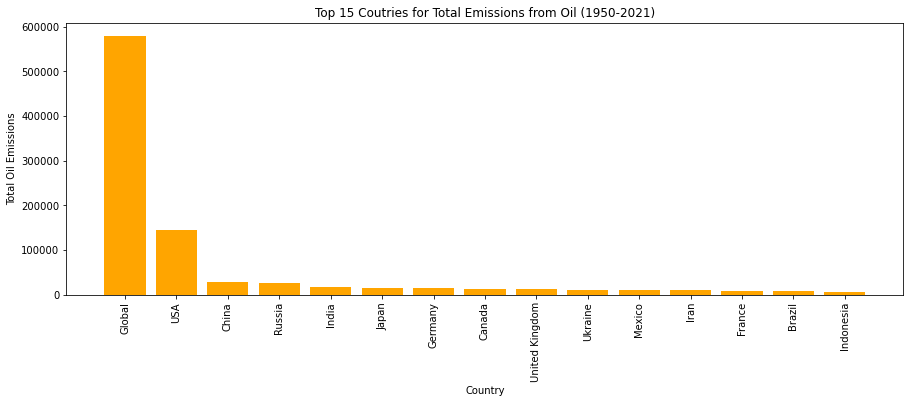

In [14]:
# Plot the top 15 coutries for total oil emissions over time

oil_values = list(cleaned_emissions_df.groupby('Country').sum().sort_values(by='Oil',ascending=False)['Oil'])

fig3 = plt.figure(figsize=(15,5),)
plt.bar(countries[:15], oil_values[:15], color ='orange')
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Total Oil Emissions")
plt.title("Top 15 Coutries for Total Emissions from Oil (1950-2021)")


Text(0.5, 1.0, 'Top 15 Coutries for Total Emissions from Gas (1950-2021)')

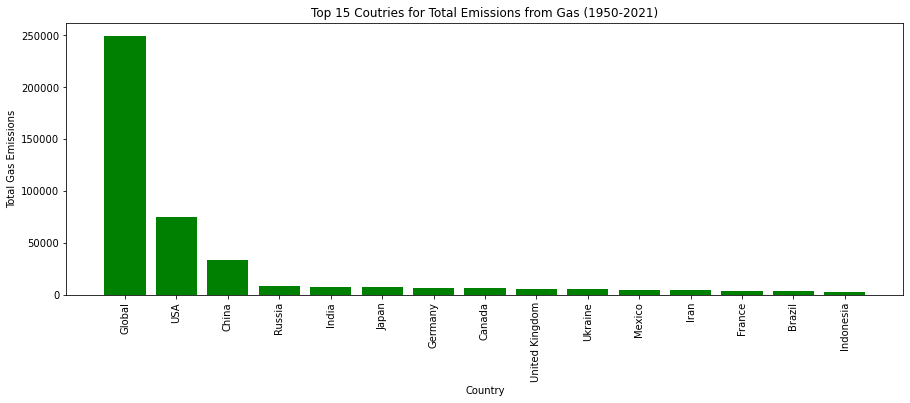

In [15]:
# Plot the top 15 coutries for total gas emissions over time

gas_values = list(cleaned_emissions_df.groupby('Country').sum().sort_values(by='Gas',ascending=False)['Gas'])

fig4 = plt.figure(figsize=(15,5),)
plt.bar(countries[:15], gas_values[:15], color ='green')
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Total Gas Emissions")
plt.title("Top 15 Coutries for Total Emissions from Gas (1950-2021)")


Text(0.5, 1.0, 'Top 15 Coutries for Total Emissions from Cement (1950-2021)')

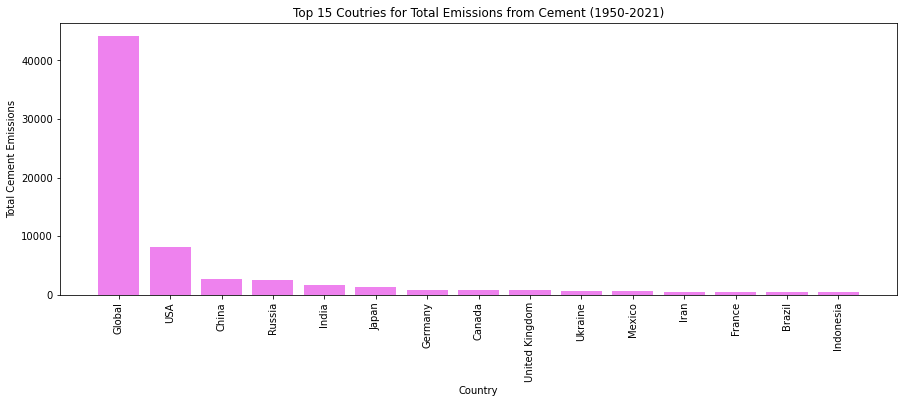

In [16]:
# Plot the top 15 coutries for total cement emissions over time

cement_values = list(cleaned_emissions_df.groupby('Country').sum().sort_values(by='Cement',ascending=False)['Cement'])

fig5 = plt.figure(figsize=(15,5),)
plt.bar(countries[:15], cement_values[:15], color ='violet')
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Total Cement Emissions")
plt.title("Top 15 Coutries for Total Emissions from Cement (1950-2021)")

Text(0.5, 1.0, 'Top 15 Coutries for Total Emissions from Flaring (1950-2021)')

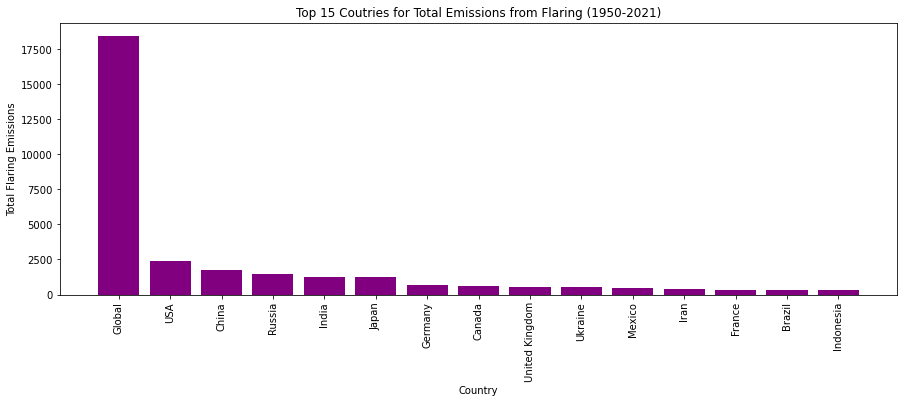

In [17]:
# Plot the top 15 coutries for total flaring emissions over time

flaring_values = list(cleaned_emissions_df.groupby('Country').sum().sort_values(by='Flaring',ascending=False)['Flaring'])

fig6 = plt.figure(figsize=(15,5),)
plt.bar(countries[:15], flaring_values[:15], color ='purple')
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Total Flaring Emissions")
plt.title("Top 15 Coutries for Total Emissions from Flaring (1950-2021)")

In [18]:
# Mean emission source category for each country

Coal_mean = cleaned_emissions_df.groupby(['ISO 3166-1 alpha-3','Country'])['Coal'].mean().sort_values(ascending=False)[0:90].reset_index()

Oil_mean = cleaned_emissions_df.groupby(['ISO 3166-1 alpha-3','Country'])['Oil'].mean().sort_values(ascending=False)[0:90].reset_index()

Gas_mean = cleaned_emissions_df.groupby(['ISO 3166-1 alpha-3','Country'])['Gas'].mean().sort_values(ascending=False)[0:90].reset_index()

Cement_mean = cleaned_emissions_df.groupby(['ISO 3166-1 alpha-3','Country'])['Cement'].mean().sort_values(ascending=False)[0:90].reset_index()

Flaring_mean = cleaned_emissions_df.groupby(['ISO 3166-1 alpha-3','Country'])['Flaring'].mean().sort_values(ascending=False)[0:90].reset_index()

# Total_mean = cleaned_emissions_df.groupby(['ISO 3166-1 alpha-3','Country'])['Total'].mean().sort_values(ascending=False)[0:90].reset_index()


In [ ]:
# Plot the mean coal amissions for each country

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def chlorepath(data,color):
    fig=px.choropleth(data, locations="ISO 3166-1 alpha-3",
                    color= color, 
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig7=chlorepath(Coal_mean,'Coal')


In [ ]:
# Plot the mean oil amissions for each country

fig8=chlorepath(Oil_mean,'Oil')


In [ ]:
# Plot the mean gas amissions for each country

fig9=chlorepath(Gas_mean,'Gas')


In [ ]:
# Plot the mean Cement amissions for each country

fig10=chlorepath(Cement_mean,'Cement')


In [ ]:
# Plot the mean flaring amissions for each country

fig11=chlorepath(Flaring_mean,'Flaring')
